In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import glob
import random

In [2]:
imgs = glob.glob('./dataset/*.png')
random.shuffle(imgs)
imgs

['./dataset\\7gce6.png',
 './dataset\\myf82.png',
 './dataset\\dyp7n.png',
 './dataset\\pyefb.png',
 './dataset\\y7mnm.png',
 './dataset\\wm746.png',
 './dataset\\yxd7m.png',
 './dataset\\5expp.png',
 './dataset\\bw44w.png',
 './dataset\\ygenn.png',
 './dataset\\2cg58.png',
 './dataset\\8n56m.png',
 './dataset\\y2436.png',
 './dataset\\f6ww8.png',
 './dataset\\fbp2c.png',
 './dataset\\88bgx.png',
 './dataset\\e8dxn.png',
 './dataset\\m22e3.png',
 './dataset\\ywn6f.png',
 './dataset\\e3ndn.png',
 './dataset\\mc35n.png',
 './dataset\\5wddw.png',
 './dataset\\7gmf3.png',
 './dataset\\p8c24.png',
 './dataset\\b26nd.png',
 './dataset\\2npg6.png',
 './dataset\\nwfde.png',
 './dataset\\8e32m.png',
 './dataset\\pym7p.png',
 './dataset\\nfcwy.png',
 './dataset\\5nxnn.png',
 './dataset\\c6f8g.png',
 './dataset\\6ydyp.png',
 './dataset\\22d5n.png',
 './dataset\\y7d75.png',
 './dataset\\pm363.png',
 './dataset\\m5ym2.png',
 './dataset\\47m2b.png',
 './dataset\\e72cd.png',
 './dataset\\gy433.png',


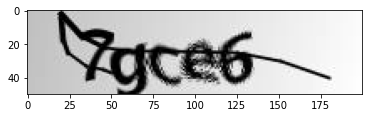

In [3]:
import cv2
org_img = cv2.imread(imgs[0])
gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [4]:
df = pd.DataFrame(columns=['filename','extension','label','labelsize','char1','char2','char3','char4','char5'])

In [5]:
i = 0
for _, _, files in os.walk('./dataset'):
    for f in files:
        df.loc[i,'filename'] = f
        df.loc[i,'extension'] = f.split('.')[1]
        df.loc[i,'label'] = f.split('.')[0]
        df.loc[i,'labelsize'] = len(f.split('.')[0])
        df.loc[i,'char1'] = f.split('.')[0][0]
        df.loc[i,'char2'] = f.split('.')[0][1]
        df.loc[i,'char3'] = f.split('.')[0][2]
        df.loc[i,'char4'] = f.split('.')[0][3]
        df.loc[i,'char5'] = f.split('.')[0][4]
        i = i+1

In [6]:
df

,filename,extension,label,labelsize,char1,char2,char3,char4,char5
0,226md.png,png,226md,5,2,2,6,m,d
1,22d5n.png,png,22d5n,5,2,2,d,5,n
2,2356g.png,png,2356g,5,2,3,5,6,g
3,23mdg.png,png,23mdg,5,2,3,m,d,g
4,23n88.png,png,23n88,5,2,3,n,8,8
...,...,...,...,...,...,...,...,...,...
1065,yx2d4.png,png,yx2d4,5,y,x,2,d,4
1066,yxd7m.png,png,yxd7m,5,y,x,d,7,m
1067,yy824.png,png,yy824,5,y,y,8,2,4
1068,yyg5g.png,png,yyg5g,5,y,y,g,5,g


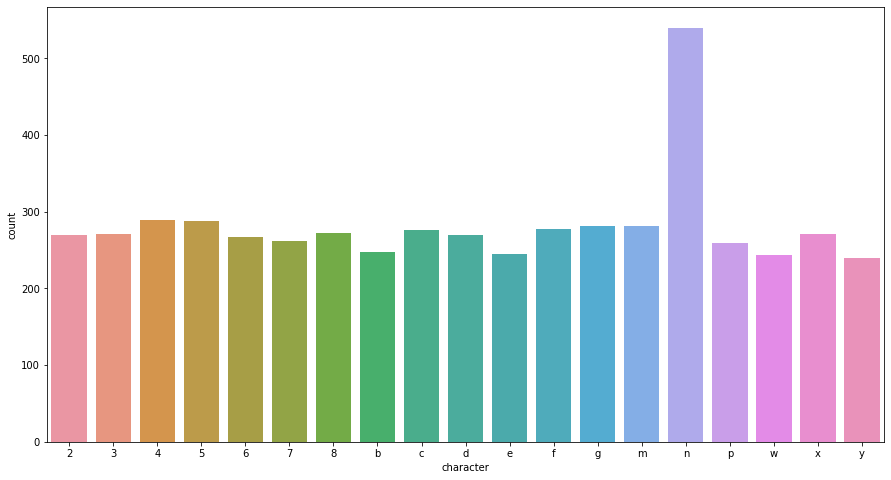

In [7]:
data = pd.DataFrame(df['char1'].value_counts()+df['char2'].value_counts()+df['char3'].value_counts()+df['char4'].value_counts()+df['char5'].value_counts()).reset_index()
data.columns = ['character','count']
plt.figure(figsize=(15, 8))
sns.barplot(data=data, x='character', y='count')
plt.show()

In [8]:
# Dictionaries that will be used to convert characters to integers and vice-versa
vocabulary = {'2','3','4','5','6','7','8','b','c','d','e','f','g','m','n','p','w','x','y'}
char_to_num = {'2':0,
               '3':1,
               '4':2,
               '5':3,
               '6':4,
               '7':5,
               '8':6,
               'b':7,
               'c':8,
               'd':9,
               'e':10,
               'f':11,
               'g':12,
               'm':13,
               'n':14,
               'p':15,
               'w':16,
               'x':17,
               'y':18}

In [9]:
img_data = []
labels = []
from tqdm import tqdm
for i in tqdm(range(len(imgs))):
    img = tf.io.read_file(imgs[i])
#     img = cv2.imread(imgs[i])
    img = tf.io.decode_png(img, channels=1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.crop_to_bounding_box(img, offset_height=0, offset_width=25, target_height=50, target_width=125)
    img = tf.image.resize(img,size=[50,200],method='bilinear', preserve_aspect_ratio=False,antialias=False, name=None)
    img = tf.transpose(img, perm=[1, 0, 2])
    label = list(map(lambda x:char_to_num[x], imgs[i].split(os.path.sep)[-1].split('.')[0]))
    img_data.append(img)
    labels.append(label)

100%|█████████████████████████████████████████████████████████████████████████████| 1040/1040 [00:01<00:00, 793.51it/s]


In [10]:
img_data

[<tf.Tensor: shape=(200, 50, 1), dtype=float32, numpy=
 array([[[0.8000001 ],
         [0.8117648 ],
         [0.7490196 ],
         ...,
         [0.79215693],
         [0.79215693],
         [0.79215693]],
 
        [[0.7879903 ],
         [0.799755  ],
         [0.76274514],
         ...,
         [0.79215693],
         [0.79215693],
         [0.79215693]],
 
        [[0.7725491 ],
         [0.78259814],
         [0.7830883 ],
         ...,
         [0.792402  ],
         [0.792402  ],
         [0.792402  ]],
 
        ...,
 
        [[0.9215687 ],
         [0.9215687 ],
         [0.9215687 ],
         ...,
         [0.9333334 ],
         [0.93725497],
         [0.93725497]],
 
        [[0.9237746 ],
         [0.9237746 ],
         [0.9237746 ],
         ...,
         [0.9355393 ],
         [0.9394609 ],
         [0.9394609 ]],
 
        [[0.92549026],
         [0.92549026],
         [0.92549026],
         ...,
         [0.93725497],
         [0.94117653],
         [0.94117653]]], d

In [11]:
labels

[[5, 12, 8, 10, 4],
 [13, 18, 11, 6, 0],
 [9, 18, 15, 5, 14],
 [15, 18, 10, 11, 7],
 [18, 5, 13, 14, 13],
 [16, 13, 5, 2, 4],
 [18, 17, 9, 5, 13],
 [3, 10, 17, 15, 15],
 [7, 16, 2, 2, 16],
 [18, 12, 10, 14, 14],
 [0, 8, 12, 3, 6],
 [6, 14, 3, 4, 13],
 [18, 0, 2, 1, 4],
 [11, 4, 16, 16, 6],
 [11, 7, 15, 0, 8],
 [6, 6, 7, 12, 17],
 [10, 6, 9, 17, 14],
 [13, 0, 0, 10, 1],
 [18, 16, 14, 4, 11],
 [10, 1, 14, 9, 14],
 [13, 8, 1, 3, 14],
 [3, 16, 9, 9, 16],
 [5, 12, 13, 11, 1],
 [15, 6, 8, 0, 2],
 [7, 0, 4, 14, 9],
 [0, 14, 15, 12, 4],
 [14, 16, 11, 9, 10],
 [6, 10, 1, 0, 13],
 [15, 18, 13, 5, 15],
 [14, 11, 8, 16, 18],
 [3, 14, 17, 14, 14],
 [8, 4, 11, 6, 12],
 [4, 18, 9, 18, 15],
 [0, 0, 9, 3, 14],
 [18, 5, 9, 5, 3],
 [15, 13, 1, 4, 1],
 [13, 3, 18, 13, 0],
 [2, 5, 13, 0, 7],
 [10, 5, 0, 8, 9],
 [12, 18, 2, 1, 1],
 [1, 18, 12, 9, 10],
 [7, 16, 13, 10, 10],
 [4, 5, 5, 12, 1],
 [14, 3, 17, 0, 14],
 [11, 18, 11, 7, 14],
 [0, 14, 11, 0, 4],
 [11, 3, 10, 3, 10],
 [3, 1, 0, 3, 13],
 [10, 14, 14, 

In [12]:
len(img_data)

1040

In [13]:
len(labels)

1040

In [14]:
img_data = np.array(img_data)
labels = np.array(labels)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(img_data, labels, test_size=0.2, shuffle=True, random_state=42)

In [17]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(832, 200, 50, 1) (832, 5)
(208, 200, 50, 1) (208, 5)


In [20]:
def build_model():
    
    # Inputs to the model
    input_img = layers.Input(shape=(200,50,1), name="image", dtype="float32") 

    # First conv block
    x = layers.Conv2D(32,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1")(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64 --> output volume shape = (50,12,64) 
    # Reshape to "split" the volume in 5 time-steps
    x = layers.Reshape(target_shape=(5, 7680), name="reshape")(x)

    # FC layers
    x = layers.Dense(256, activation="relu", name="dense1")(x)
    x = layers.Dense(64, activation="relu", name="dense2")(x)
   
    # Output layer
    output = layers.Dense(19, activation="softmax", name="dense3")(x) 
    
    # Define the model
    model = keras.models.Model(inputs=input_img, outputs=output, name="ocr_classifier_based_model")
    
    # Compile the model and return
    model.compile(optimizer=keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics="accuracy")
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_classifier_based_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 200, 50, 1)]      0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 200, 50, 32)       320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 100, 25, 32)       0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 100, 25, 64)       18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 50, 12, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 5, 7680)           0         
_________________________________________________________________
dense1 (Dense)               (None, 5, 2

In [21]:
history = model.fit(X_train, y_train, batch_size = 32,
                    validation_data=(X_val, y_val), epochs = 30)

Epoch 1/30
26/26 [==============================] - 6s 221ms/step - loss: 3.0107 - accuracy: 0.1091 - val_loss: 2.4905 - val_accuracy: 0.2769
Epoch 2/30
26/26 [==============================] - 6s 225ms/step - loss: 1.7013 - accuracy: 0.5276 - val_loss: 1.0594 - val_accuracy: 0.7096
Epoch 3/30
26/26 [==============================] - 6s 222ms/step - loss: 0.6990 - accuracy: 0.8135 - val_loss: 0.6064 - val_accuracy: 0.8298
Epoch 4/30
26/26 [==============================] - 6s 230ms/step - loss: 0.4174 - accuracy: 0.8839 - val_loss: 0.4574 - val_accuracy: 0.8538
Epoch 5/30
26/26 [==============================] - 6s 230ms/step - loss: 0.2873 - accuracy: 0.9149 - val_loss: 0.3978 - val_accuracy: 0.8817
Epoch 6/30
26/26 [==============================] - 6s 222ms/step - loss: 0.2207 - accuracy: 0.9346 - val_loss: 0.3721 - val_accuracy: 0.8962
Epoch 7/30
26/26 [==============================] - 6s 242ms/step - loss: 0.1691 - accuracy: 0.9512 - val_loss: 0.3552 - val_accuracy: 0.9000
Epoch 

In [24]:
model.evaluate(X_train, y_train)

26/26 [==============================] - 2s 60ms/step - loss: 0.0049 - accuracy: 0.9998


[0.004936260171234608, 0.9997596144676208]

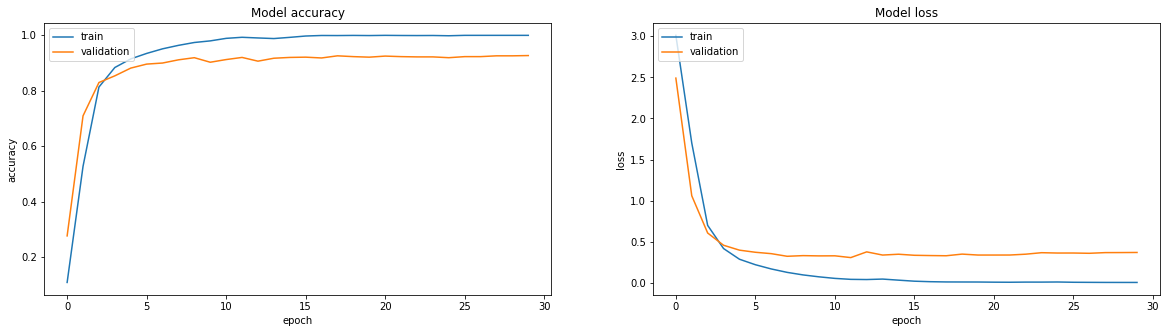

In [22]:
fig=plt.figure(figsize=(20, 5))
# summarize history for accuracy
fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

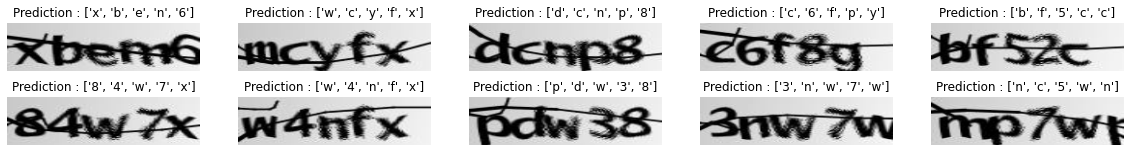

In [23]:
y_pred = model.predict(X_val) # y_pred shape = (104,50,19)
y_pred = np.argmax(y_pred, axis=2)
num_to_char = {'-1':'UKN','0':'2','1':'3','2':'4','3':'5','4':'6','5':'7','6':'8','7':'b','8':'c','9':'d','10':'e','11':'f','12':'g','13':'m','14':'n','15':'p','16':'w','17':'x','18':'y'}
nrow = 1
fig=plt.figure(figsize=(20, 5))
for i in range(0,10):
    if i>4: nrow = 2
    fig.add_subplot(nrow, 5, i+1)
    plt.imshow(X_val[i].transpose((1,0,2)),cmap='gray')
    plt.title('Prediction : ' + str(list(map(lambda x:num_to_char[str(x)], y_pred[i]))))
    plt.axis('off')
plt.show() 